<a href="https://colab.research.google.com/github/wahyunh10/EDA-Case-Study-on-Bank-Loan/blob/main/EDA_Case_Study_on_Bank_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA Case Study on Bank Loan**

In [1]:
# importing all the necessry libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# To increase the display size for rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
# Reading the application CSV dataset
df1=pd.read_csv("application_data.csv")
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborer

In [5]:
# Reading the shape
df1.shape

(296483, 122)

In [6]:
# checking statistics
df1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2000.000000,1.999000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,693.000000,2000.0,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,874.000000,1995.000000,1587.000000,1008.000000,856.000000,1043.000000,703.000000,628.000000,965.000000,1023.000000,1037.000000,667.000000,840.000000,655.000000,1019.000000,637.000000,937.000000,1008.000000,856.000000,1043.000000,703.000000,628.000000,965.000000,1023.000000,1037.000000,667.000000,840.000000,655.000000,1019.000000,637.000000,937.000000,1008.000000,856.000000,1043.000000,703.000000,628.000000,965.000000,1023.000000,1037.000000,667.000000,840.000000,655.000000,1019.000000,637.000000,937.000000,1056.000000,1988.000000,1988.000000,1988.000000,1988.000000,2000.000000,2000.0,2000.000000,2000.0,2000.000000,2000.000000,2000.0,2000.000000,2000.000000,2000.0,2000.000000,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000
mean,101166.644000,0.072500,0.407000,1.701188e+05,5.961248e+05,27126.171000,5.370967e+05,0.021383,-15922.331500,61414.974500,-4932.930500,-2946.395000,11.942280,1.0,0.826500,0.202000,0.99750,0.291000,0.059500,2.139000,2.038500,2.019000,12.082500,0.020000,0.052500,0.040000,0.08150,0.249000,0.192000,0.499079,0.514742,0.513002,0.119090,0.091099,0.979953,0.752288,0.045047,0.082946,0.150216,0.227528,0.240785,0.068679,0.100009,0.109655,0.009034,0.031209,0.114295,0.089540,0.977671,0.758449,0.041001,0.076972,0.145747,0.224012,0.236563,0.067165,0.102537,0.107046,0.008348,0.029985,0.119865,0.090325,0.980253,0.755610,0.045441,0.082632,0.150044,0.227628,0.241061,0.069561,0.101390,0.111274,0.009027,0.031636,0.103036,1.365191,0.135815,1.349095,0.095573,-974.600000,0.0,0.708000,0.0,0.015000,0.076000,0.0,0.088000,0.004000,0.0,0.005000,0.0,0.002000,0.00250,0.000500,0.

In [7]:
# Checking data types.
df1.dtypes

SK_ID_CURR                      float64
TARGET                          float64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                    float64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      float64
DAYS_EMPLOYED                   float64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 float64
OWN_CAR_AGE                     float64
FLAG_MOBIL                      float64
FLAG_EMP_PHONE                  float64
FLAG_WORK_PHONE                 float64


In [8]:
# Checking for number of unique data in each column
df1.nunique().sort_values()

FLAG_DOCUMENT_7                    1
FLAG_MOBIL                         1
FLAG_DOCUMENT_10                   1
FLAG_DOCUMENT_4                    1
FLAG_DOCUMENT_12                   1
FLAG_DOCUMENT_2                    1
FLAG_EMAIL                         2
FLAG_DOCUMENT_8                    2
REG_REGION_NOT_LIVE_REGION         2
REG_REGION_NOT_WORK_REGION         2
LIVE_REGION_NOT_WORK_REGION        2
REG_CITY_NOT_LIVE_CITY             2
REG_CITY_NOT_WORK_CITY             2
LIVE_CITY_NOT_WORK_CITY            2
FLAG_DOCUMENT_17                   2
FLAG_DOCUMENT_15                   2
FLAG_DOCUMENT_14                   2
FLAG_DOCUMENT_13                   2
FLAG_DOCUMENT_3                    2
FLAG_DOCUMENT_11                   2
FLAG_DOCUMENT_5                    2
FLAG_DOCUMENT_6                    2
FLAG_DOCUMENT_9                    2
FLAG_PHONE                         2
FLAG_CONT_MOBILE                   2
FLAG_DOCUMENT_16                   2
FLAG_EMP_PHONE                     2
A

In [9]:
## Numeric convertion
num_col=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH',
                'DAYS_EMPLOYED','EXT_SOURCE_2','EXT_SOURCE_3']
df1[num_col]=df1[num_col].apply(pd.to_numeric)

# **Handling missing values and invalid data**

In [10]:
##  Column -> OCCUPATION_TYPE
df1.OCCUPATION_TYPE.value_counts()

Laborers                 365
Sales staff              216
Core staff               190
Drivers                  136
Managers                 127
High skill tech staff     87
Accountants               63
Medicine staff            61
Cooking staff             36
Security staff            35
Cleaning staff            23
Low-skill Laborers        20
Private service staff     19
Secretaries               10
Waiters/barmen staff       7
Realty agents              6
IT staff                   4
HR staff                   4
Name: OCCUPATION_TYPE, dtype: int64

In [11]:
## Column EXT_SOURCE_2 and 3
print(df1.EXT_SOURCE_3.describe())
print(df1.EXT_SOURCE_3.describe())

count    1587.000000
mean        0.513002
std         0.197346
min         0.000527
25%         0.376558
50%         0.538863
75%         0.673830
max         0.865896
Name: EXT_SOURCE_3, dtype: float64
count    1587.000000
mean        0.513002
std         0.197346
min         0.000527
25%         0.376558
50%         0.538863
75%         0.673830
max         0.865896
Name: EXT_SOURCE_3, dtype: float64


External source date are normalized source information and imputing with with wrong values may impact the analysis. So leaving the missing values.

In [13]:
## Columns -> AMT_REQ_CREDIT_BUREAU.*
print(df1.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts())
print(df1.AMT_REQ_CREDIT_BUREAU_DAY.value_counts())
print(df1.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts())
print(df1.AMT_REQ_CREDIT_BUREAU_MON.value_counts())
print(df1.AMT_REQ_CREDIT_BUREAU_QRT.value_counts())
print(df1.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts())

0.0    1693
1.0      16
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
0.0    1700
1.0       7
3.0       1
2.0       1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
0.0    1659
1.0      49
3.0       1
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
0.0     1451
1.0      198
2.0       22
3.0       16
5.0        6
4.0        5
9.0        3
11.0       3
6.0        2
8.0        2
7.0        1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64
0.0    1336
1.0     258
2.0      95
3.0      15
4.0       5
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64
0.0    448
1.0    388
2.0    336
3.0    227
4.0    141
5.0     81
6.0     34
7.0     24
8.0     19
9.0     11
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64


Other than AMT_REQ_CREDIT_BUREAU_YEAR field all other Bureau fields majority of the records are having zero calls to the customer care.

In [14]:
## Column -> AMT_ANNUITY
df1.AMT_ANNUITY.describe()

count      2000.000000
mean      27126.171000
std       14333.551813
min        2974.500000
25%       16710.750000
50%       25321.500000
75%       34642.125000
max      116505.000000
Name: AMT_ANNUITY, dtype: float64

In [15]:
 ## The max and mean are having huge difference, so we are imputing with median
df1.loc[df1['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=df1['AMT_ANNUITY'].median()

In [16]:
## Column ->AMT_GOODS_PRICE
df1.AMT_GOODS_PRICE.describe()

count    1.999000e+03
mean     5.370967e+05
std      3.613636e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      2.254500e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [17]:
## filling the missing values with mean 
df1.loc[df1['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=df1['AMT_GOODS_PRICE'].mean()

In [18]:
## Column -> CNT_FAM_MEMBERS
df1.loc[df1['CNT_FAM_MEMBERS'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25321.5,537096.696348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25321.5,537096.696348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25321.5,537096.696348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25321.5,537096.696348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [19]:
# Replacing with 1 for missing values.
df1['CNT_FAM_MEMBERS'].fillna(1.0,inplace=True)

In [20]:
## Column -> CODE_GENDER
df1.CODE_GENDER.value_counts()

F    1292
M     708
Name: CODE_GENDER, dtype: int64

In [22]:
## Column -> FAMILY_STATUS
df1.NAME_FAMILY_STATUS.value_counts()

Married                 1261
Single / not married     296
Civil marriage           203
Widow                    123
Separated                117
Name: NAME_FAMILY_STATUS, dtype: int64

In [23]:
## When we took unknown family status, cannot impute as number of children is unknown and retaining as unknown itself
df1[df1['NAME_FAMILY_STATUS']=="Unknown"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [24]:
## Column -> ORGANIZATION_TYPE
df1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    457
XNA                       347
Self-employed             269
Other                      98
Medicine                   75
Business Entity Type 2     65
Government                 60
School                     49
Kindergarten               46
Trade: type 7              41
Business Entity Type 1     39
Transport: type 4          38
Construction               30
Trade: type 3              29
Industry: type 3           23
Services                   22
Industry: type 9           21
Housing                    21
Industry: type 11          19
Transport: type 2          19
Postal                     17
Bank                       16
Agriculture                16
Military                   15
Trade: type 2              15
Transport: type 3          13
Police                     13
Security Ministries        12
Security                   10
Industry: type 7           10
Restaurant                  9
Hotel                       8
University                  8
Industry: 

In [25]:
## The second manjority is 'XNA' for Organization type . However we cannot convert to any valid values, so converting 
## them to Nan. However it will increase the NaN to 18%
df1.loc[df1['ORGANIZATION_TYPE'] == 'XNA', 'ORGANIZATION_TYPE'] = np.NaN

In [26]:
## Checking Days birth and days employed fields
print(df1['DAYS_BIRTH'].value_counts())
print(df1['DAYS_EMPLOYED'].value_counts())

-18397.0    3
-13465.0    3
-15113.0    3
-13830.0    2
-16273.0    2
           ..
-20204.0    1
-10565.0    1
-20681.0    1
-18323.0    1
-15957.0    1
Name: DAYS_BIRTH, Length: 1888, dtype: int64
 365243.0    347
-225.0         4
-215.0         4
-1252.0        4
-183.0         3
            ... 
-1890.0        1
-1327.0        1
-1244.0        1
-13878.0       1
-2270.0        1
Name: DAYS_EMPLOYED, Length: 1376, dtype: int64


* Days of birth and Days employed are in negative. We need to convert them to positive
* There is no outliers in Days of birth.
* Adding one more column age group for our analysis

In [27]:
## adding a new column called  age group. Takking the floor value of 'Age' to get in integers.
df1['AGE']=abs(df1["DAYS_BIRTH"]//365)
slots = ['0-20','20-30','30-40','40-50','50-60','60-70','70 and above']
bins = [0,20,30,40,50,60,70,100]
df1['AGE_GROUP']=pd.cut(df1['AGE'],bins,labels=slots)

In [28]:
#Removing the column Age
df1=df1.drop('AGE',axis=1)

In [29]:
## Majority of the records with 365243 are without payment difficulties. May be it is a default or maxiumum value. 
## So filling with Nan
df1.loc[df1['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = np.nan

Text(0.5, 0, 'Days of Employment')

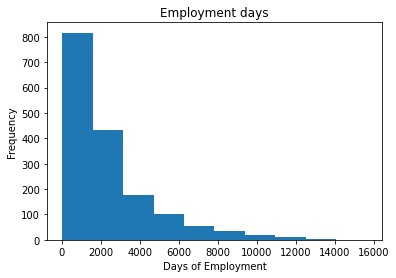

In [30]:
# Plotting to see the Days employed column
abs(df1['DAYS_EMPLOYED']).plot.hist(title = 'Employment days')
plt.xlabel('Days of Employment')

In [31]:
## adding a new column with years of experience . Taking the floor value to get as integer.
df1["YEARS_EXPERIENCE"]=abs(df1["DAYS_EMPLOYED"]//365)

In [32]:
# Removing days employed and days birth as they are not required for the analysis
df1=df1.drop('DAYS_EMPLOYED',axis=1)
df1=df1.drop('DAYS_BIRTH',axis=1)

In [33]:
## Since we have different income category of people it is good to bin the income slot to do the analysis. 
## Adding a new column to see the income range.
slots = ['0-50000','50000-100000','100000-150000', '150000-200000','200000-250000','250000-300000',
        '300000-350000','350000-400000','400000-450000','450000-500000','500000 and above']
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
df1['AMT_INCOME_RANGE']=pd.cut(df1['AMT_INCOME_TOTAL'],bins,labels=slots)

# **Handling outliers**

In [34]:
## Checking for Outliers in AMT_ANNUITY and AMT_GOODS_PRICE columns.
print(df1['AMT_ANNUITY'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95,0.99,0.999,1]))
print(df1['AMT_GOODS_PRICE'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,.95,.99,.999,1]))

0.000      2974.5
0.100     25321.5
0.200     25321.5
0.300     25321.5
0.400     25321.5
0.500     25321.5
0.600     25321.5
0.700     25321.5
0.800     25321.5
0.900     25321.5
0.950     25321.5
0.990     25321.5
0.999     40806.0
1.000    116505.0
Name: AMT_ANNUITY, dtype: float64
0.000    4.500000e+04
0.100    5.370967e+05
0.200    5.370967e+05
0.300    5.370967e+05
0.400    5.370967e+05
0.500    5.370967e+05
0.600    5.370967e+05
0.700    5.370967e+05
0.800    5.370967e+05
0.900    5.370967e+05
0.950    5.370967e+05
0.990    5.370967e+05
0.999    9.000000e+05
1.000    2.254500e+06
Name: AMT_GOODS_PRICE, dtype: float64


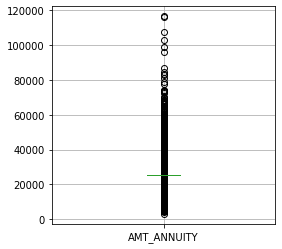

In [35]:
# Vizualising the outliers for AMT_ANNUITY
df1.boxplot(column='AMT_ANNUITY',figsize=(4,4))

In [36]:
# Identifyin the record with max value.
df1.loc[df1['AMT_ANNUITY'] >= 258025.5]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,YEARS_EXPERIENCE,AMT_INCOME_RANGE


Text(0.5, 1.0, ' Annuity vs Credit')

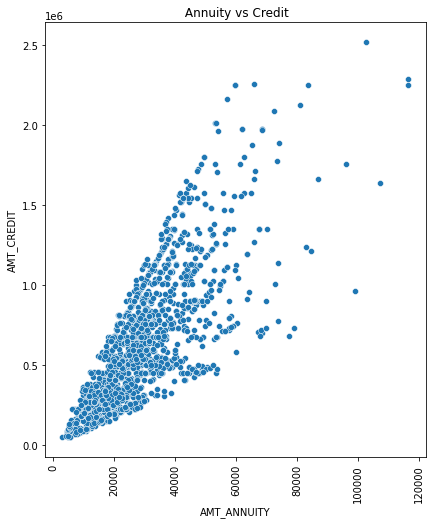

In [37]:
## Vizualising Amount Annuity and Credit via scatter plot
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
p=sns.scatterplot(x="AMT_ANNUITY", y="AMT_CREDIT", data=df1)
plt.xticks(rotation='vertical')
#plt.ylabel(" Counts")
plt.title(" Annuity vs Credit")

AMT Annuity and Credit showing a linear relationship and it is good to procced with this data.

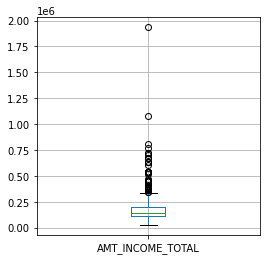

In [38]:
## Checking for outliers in AMT_INCOME_TOTAL
df1.boxplot(column='AMT_INCOME_TOTAL',figsize=(4,4))

In [39]:
#Checking what is the occupation type of the person with lowest AMT_INCOME_TOTAL
df1.loc[df1['AMT_INCOME_TOTAL'] == df1['AMT_INCOME_TOTAL'].min(), ['AMT_INCOME_TOTAL','OCCUPATION_TYPE']]

,AMT_INCOME_TOTAL,OCCUPATION_TYPE
1678,25650.0,Cleaning staff


The cleaning Staff is a valid data for minimum value

In [40]:
#Checking what is the occupation type of the person with highest AMT_INCOME_TOTAL
df1.loc[df1['AMT_INCOME_TOTAL'] == df1['AMT_INCOME_TOTAL'].max(), ['AMT_INCOME_TOTAL','OCCUPATION_TYPE']]

,AMT_INCOME_TOTAL,OCCUPATION_TYPE
1723,1935000.0,NaN


This is clearly evident that a laborers cannot be in the highest salary category. This is a true outlier and we need to remove it, so we need to analyse more with Zscore method

In [41]:
## Handling outliers using Zscore appraoch - Finding the rows which are more than 3 standard deviation from the Mean. 
from scipy import stats
out= df1[np.abs(stats.zscore(df1['AMT_INCOME_TOTAL'])) >3]
print(len(out))

0


0.0    1414
1.0     388
2.0     170
3.0      26
4.0       2
Name: CNT_CHILDREN, dtype: int64


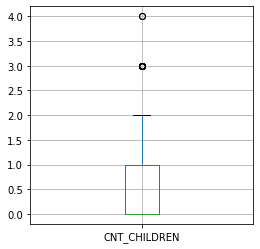

In [42]:
## Analysing CNT_CHILDREN 
print(df1.CNT_CHILDREN.value_counts())
df1.boxplot(column='CNT_CHILDREN',figsize=(4,4))

count    2.000000e+03
mean     5.961248e+05
std      3.923593e+05
min      4.797000e+04
25%      2.700000e+05
50%      5.185620e+05
75%      8.086500e+05
max      2.517300e+06
Name: AMT_CREDIT, dtype: float64


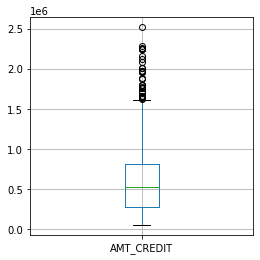

In [43]:
## Analysing AMT_CREDIT column
print(df1.AMT_CREDIT.describe())
df1.boxplot(column='AMT_CREDIT',figsize=(4,4))

In [44]:
df1.loc[df1['AMT_CREDIT'] == df1['AMT_CREDIT'].max(), ['AMT_CREDIT','OCCUPATION_TYPE']]

,AMT_CREDIT,OCCUPATION_TYPE
1969,2517300.0,Core staff


# **Checking Imbalance in data**

In [45]:
## Checking the imbalance with Target column
(df1.TARGET.sum()/len(df1))*100

0.048906682676578425

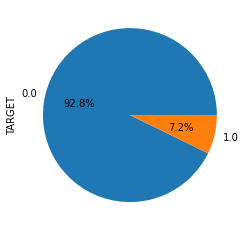

In [46]:
## Vizualising the % of Defaulters vs Non Defaulters in the dataset.
## 1 indicates Defaulters and 0 indicates non defaulters.
df1.TARGET.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')

In [47]:
### Imbalance ratio
target0_df=df1.loc[df1["TARGET"]==0]
target1_df=df1.loc[df1["TARGET"]==1]
ratio=round(len(target0_df)/len(target1_df),2)
print("Imbalance ratio from Defaulters to non Defaulters is -> 1 :",ratio)

Imbalance ratio from Defaulters to non Defaulters is -> 1 : 12.79


# **Univarate Analysis**

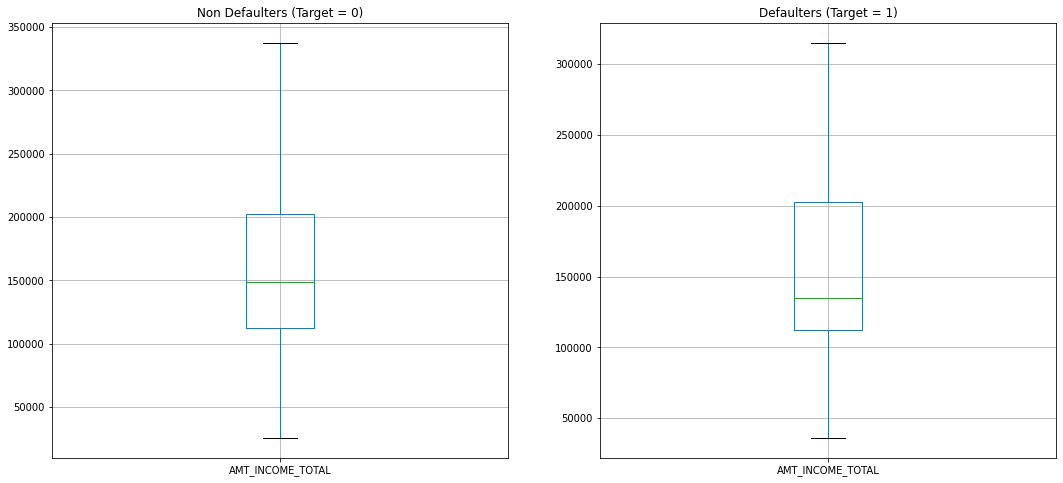

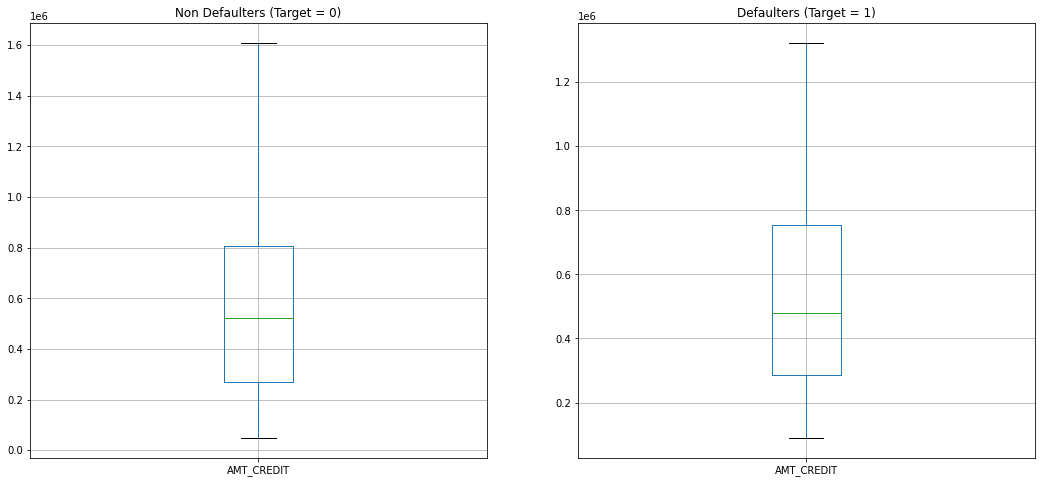

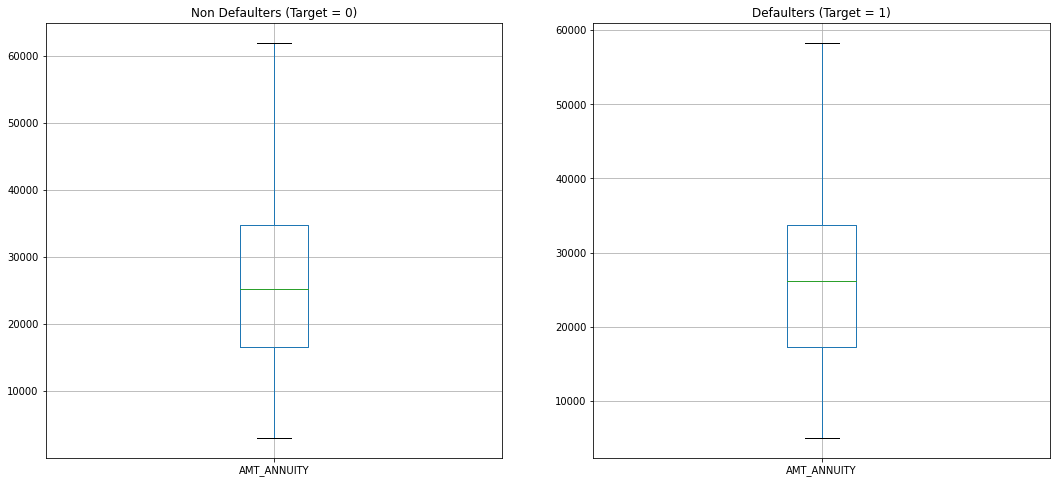

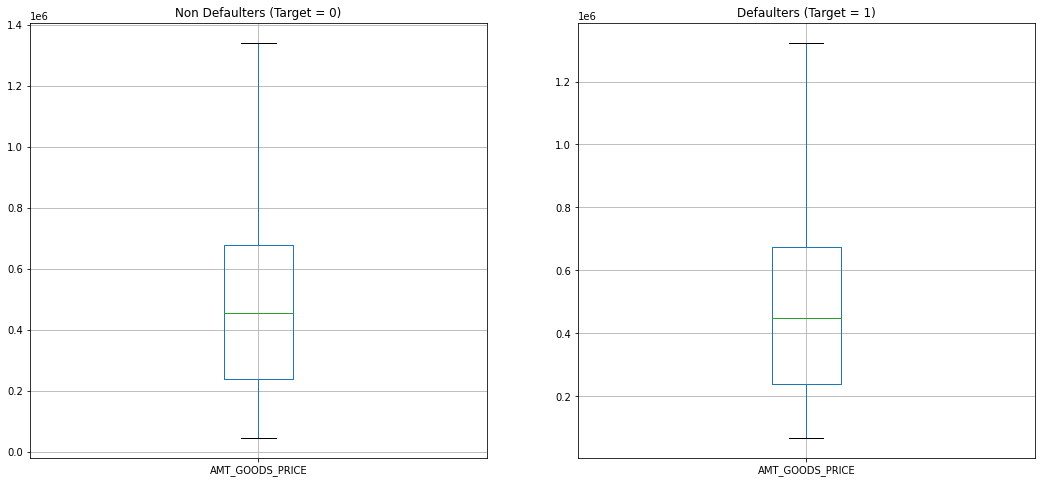

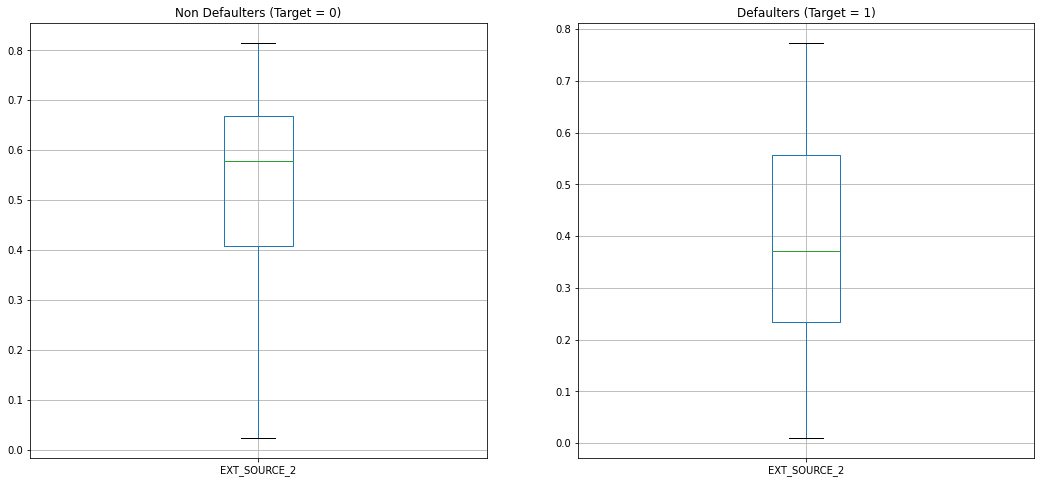

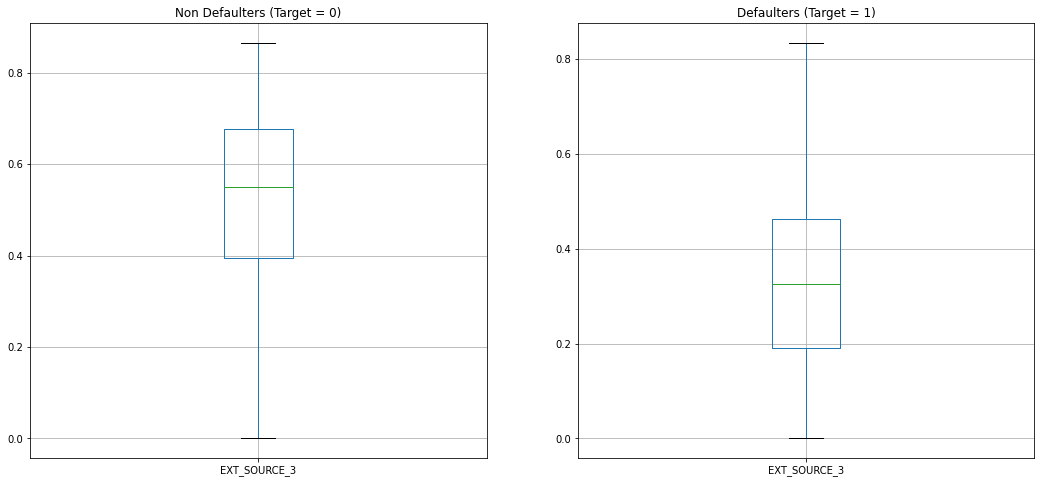

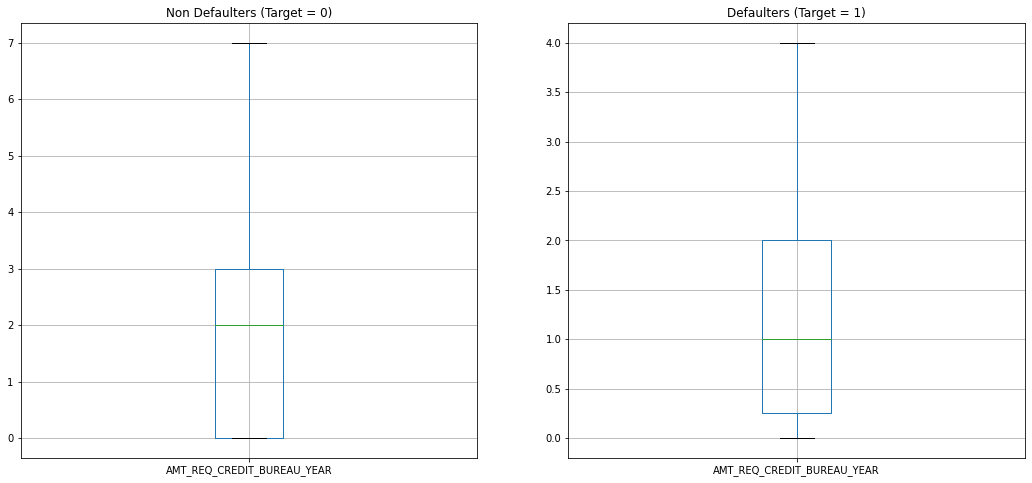

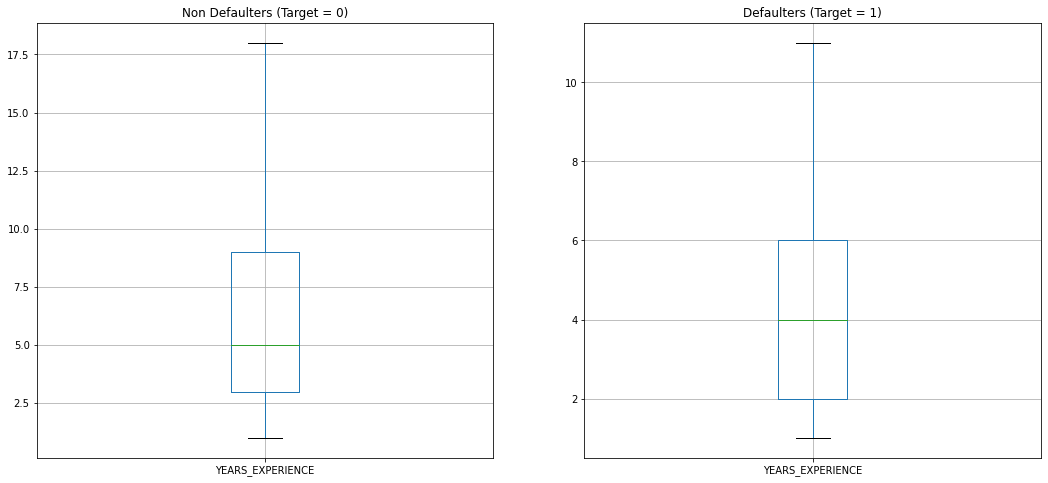

In [48]:
## Univarte Analysis of AMOUNT/EXT/BUREAU/Years fields
col = ['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_YEAR','YEARS_EXPERIENCE']
# Plotting using box plot.. Removing the oulliers using showfliers command
for i in col:
    plt.figure(figsize=(18,8))
    plt.subplot(1,2,1)
    target0_df.boxplot(column=i,showfliers=False)
    plt.title('Non Defaulters (Target = 0)')
    plt.subplot(1,2,2)
    target1_df.boxplot(column=i,showfliers=False)
    plt.title('Defaulters (Target = 1)')

Text(0.5, 1.0, 'Target = 1')

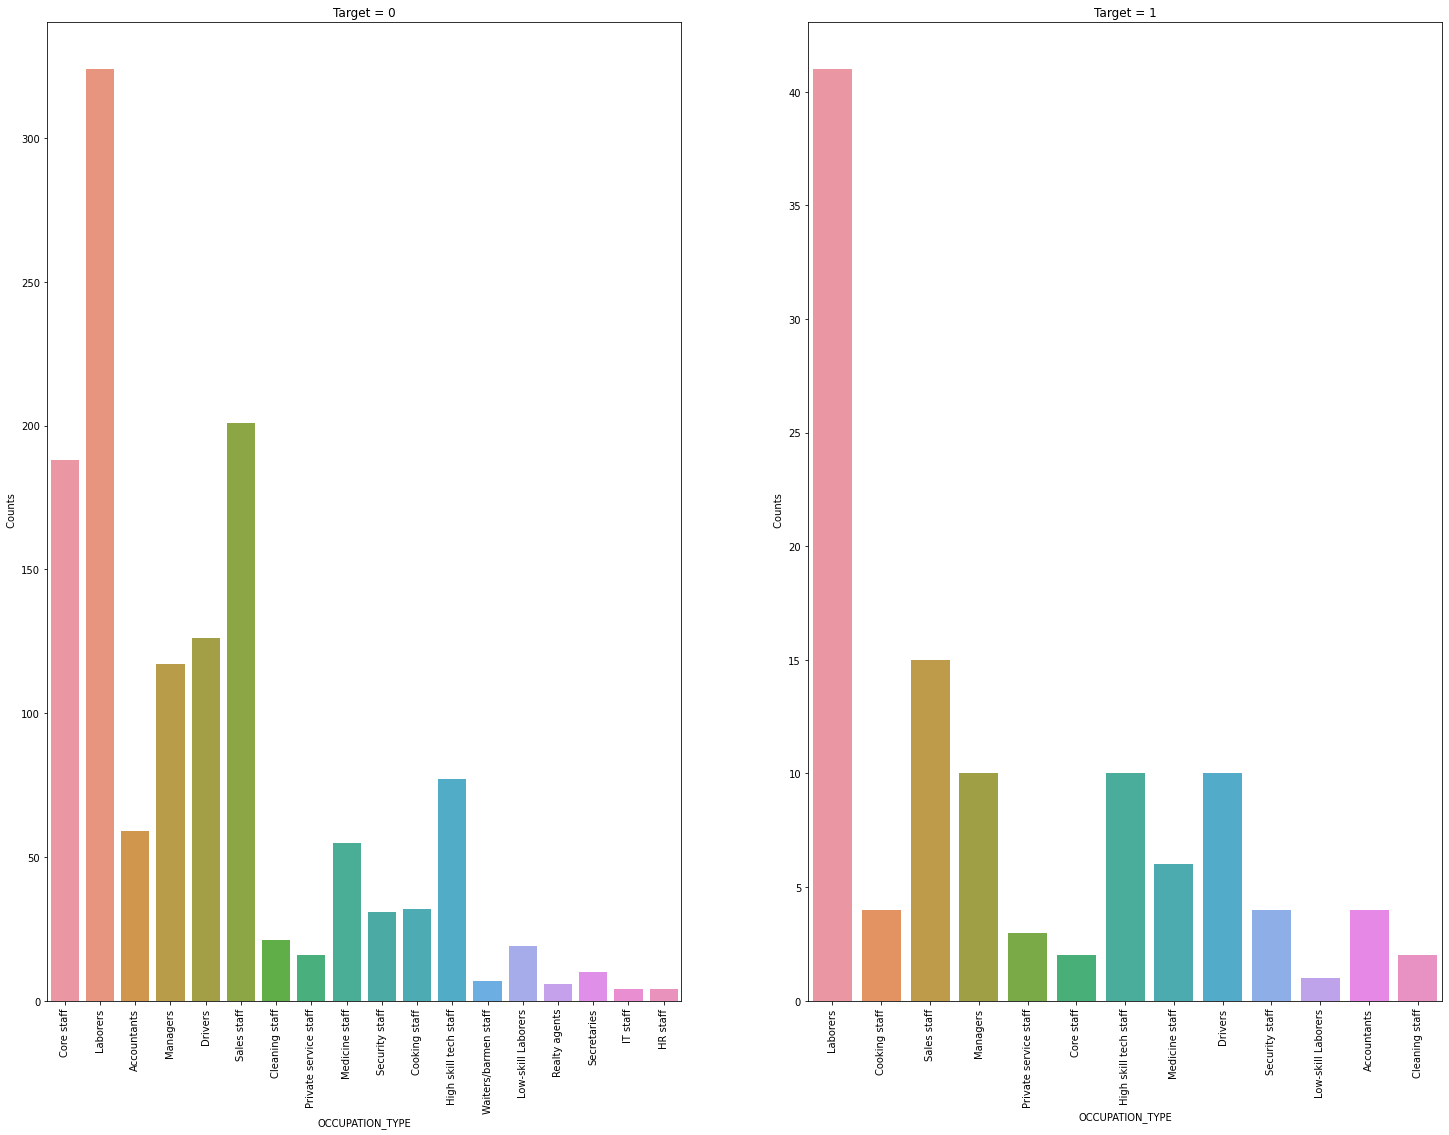

In [49]:
## Univarte analysis on Occupation type
plt.figure(figsize=(25,18))
plt.subplot(1,2,1)
p = sns.countplot(data=target0_df, x= 'OCCUPATION_TYPE')
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target = 0")
plt.subplot(1,2,2)
p = sns.countplot(data=target1_df, x= 'OCCUPATION_TYPE')
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target = 1")

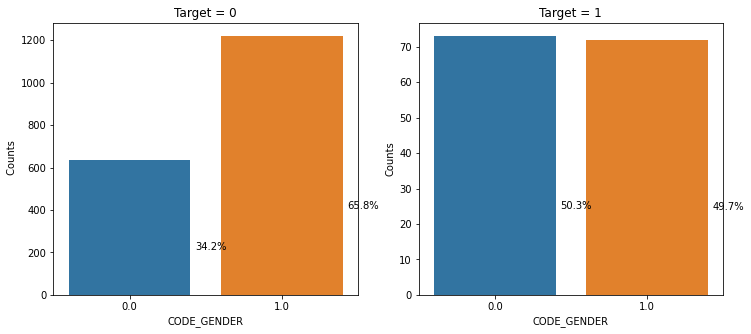

In [50]:
## Univarte analysis on Gender
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax = sns.countplot(data=target0_df, x= 'CODE_GENDER')
plt.ylabel(" Counts")
plt.title("Target = 0")
total = len(target0_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.03
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y))
plt.subplot(1,2,2)
ax = sns.countplot(data=target1_df, x= 'CODE_GENDER')
plt.ylabel("Counts")
plt.title("Target = 1")

total = len(target1_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.03
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y))

Text(0.5, 1.0, 'Target = 1')

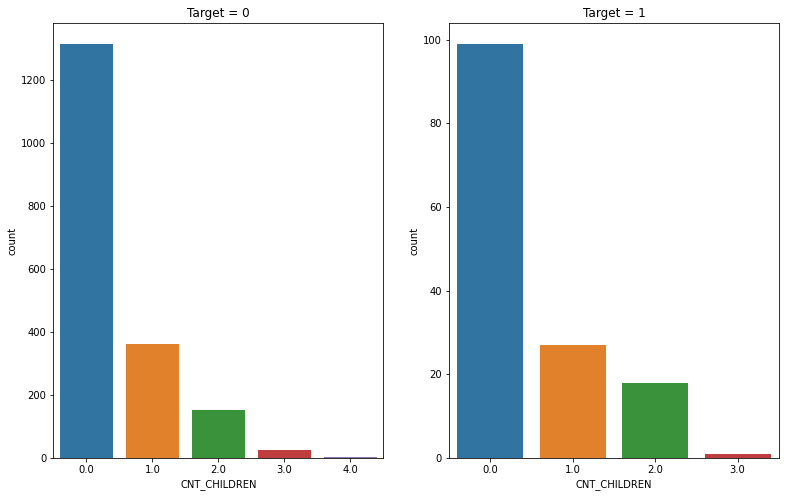

In [51]:
## Univarate Analysis on Number of children
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
p = sns.countplot(data=target0_df, x= 'CNT_CHILDREN')
plt.title("Target = 0")
plt.subplot(1,2,2)
p = sns.countplot(data=target1_df, x= 'CNT_CHILDREN')
plt.title("Target = 1")

Text(0.5, 1.0, 'Target 1')

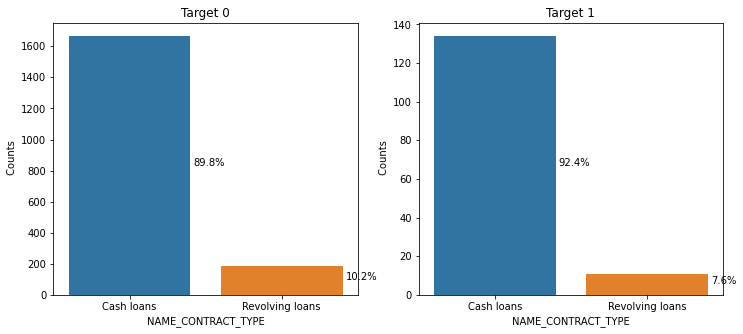

In [52]:
# Univarate analysis on NAME_CONTRACT_TYPE
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax = sns.countplot(data=target0_df, x= 'NAME_CONTRACT_TYPE')
total = len(target0_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
ax = sns.countplot(data=target1_df, x= 'NAME_CONTRACT_TYPE')
total = len(target1_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.ylabel(" Counts")
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

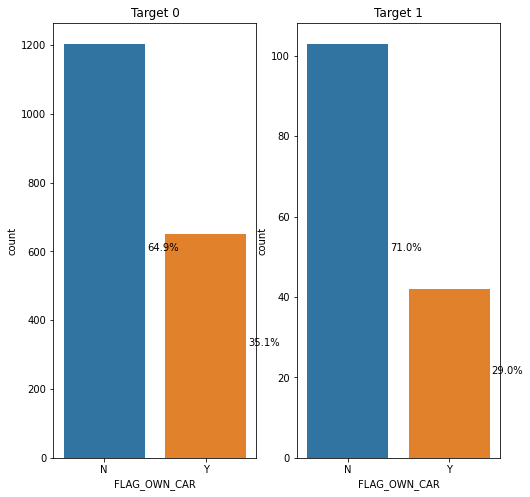

In [53]:
# Univarate analysis on OWN CAR
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
ax = sns.countplot(data=target0_df, x= 'FLAG_OWN_CAR')
total = len(target0_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        
plt.title("Target 0")
plt.subplot(1,2,2)
ax = sns.countplot(data=target1_df, x= 'FLAG_OWN_CAR')
total = len(target1_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

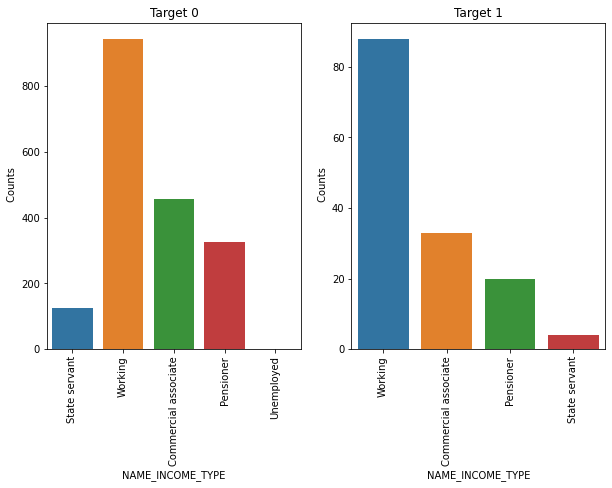

In [54]:
# Univarate analysis on Income Type
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
p = sns.countplot(data=target0_df, x= 'NAME_INCOME_TYPE')
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(data=target1_df, x= 'NAME_INCOME_TYPE')
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

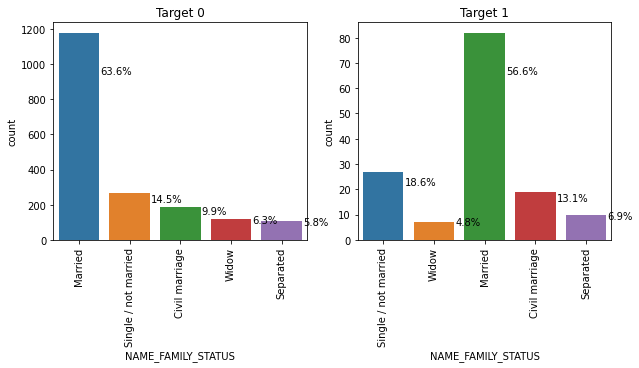

In [55]:
# Univarate analysis on Family Status
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
ax = sns.countplot(data=target0_df, x= 'NAME_FAMILY_STATUS')
plt.xticks(rotation='vertical')

total = len(target0_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/1.25
        ax.annotate(percentage, (x, y))

plt.title("Target 0")
plt.subplot(1,2,2)
ax = sns.countplot(data=target1_df, x= 'NAME_FAMILY_STATUS')
plt.xticks(rotation='vertical')
    

total = len(target1_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/1.25
        ax.annotate(percentage, (x, y))


plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

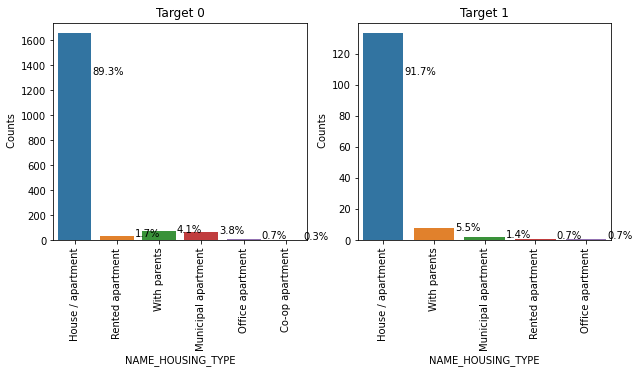

In [56]:
# Univarate analysis on Housing Type
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
ax= sns.countplot(data=target0_df, x= 'NAME_HOUSING_TYPE')


total = len(target0_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/1.25
        ax.annotate(percentage, (x, y))
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
ax = sns.countplot(data=target1_df, x= 'NAME_HOUSING_TYPE')


total = len(target1_df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/1.25
        ax.annotate(percentage, (x, y))
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

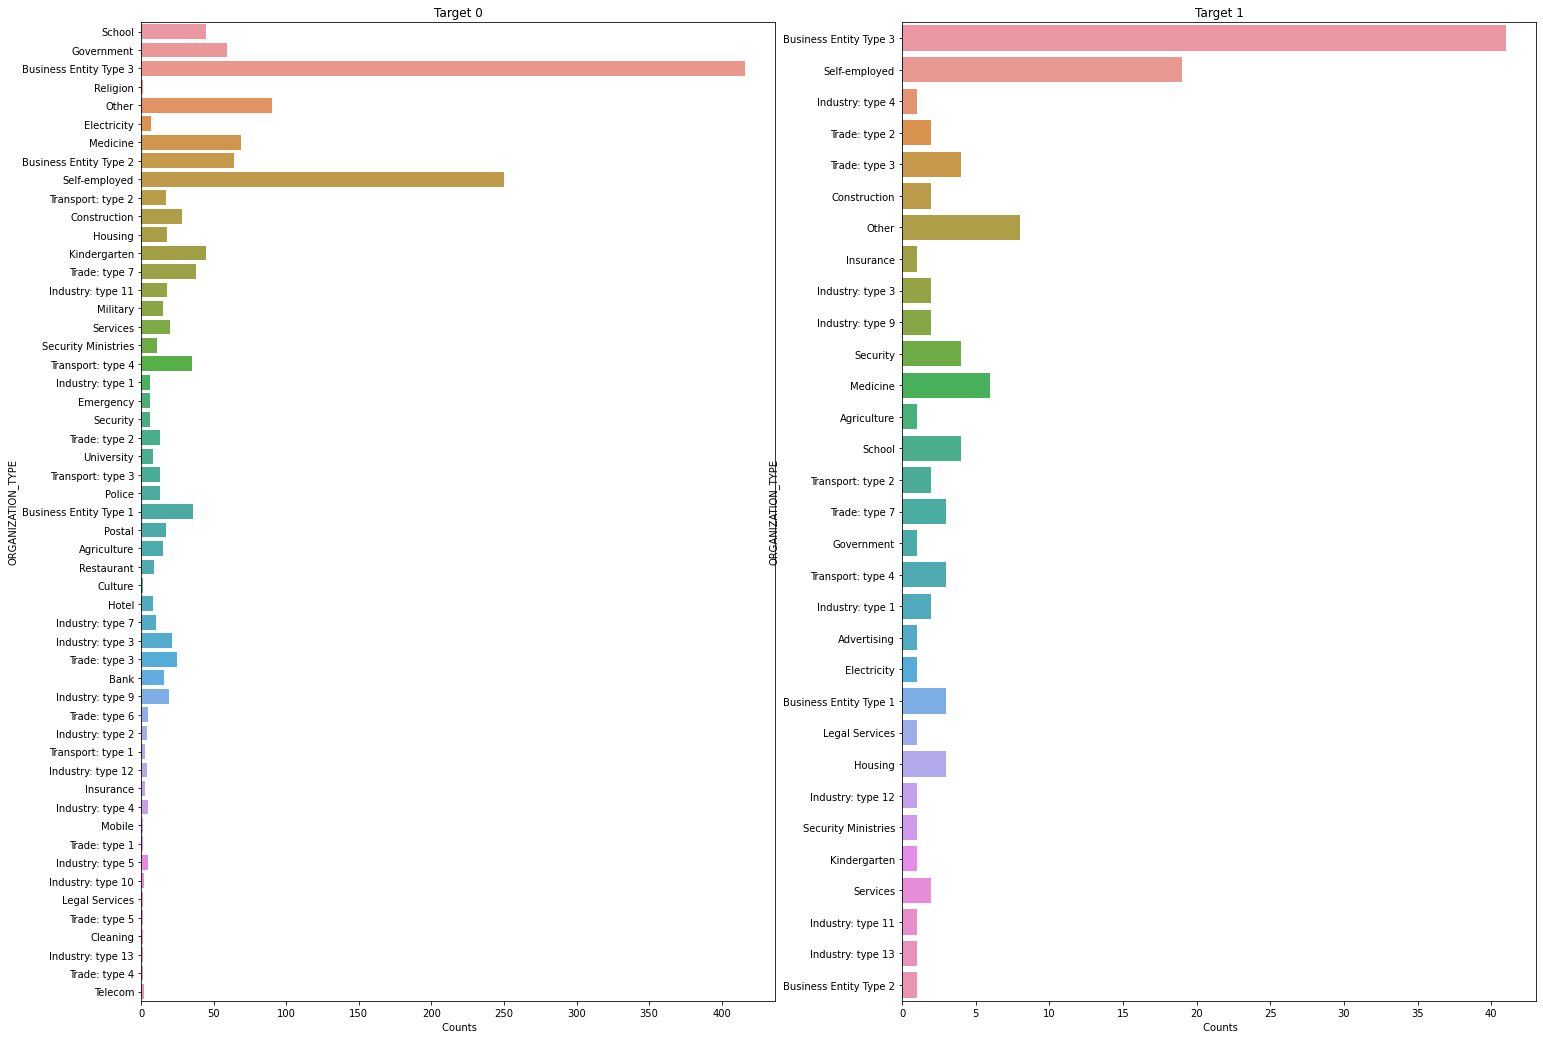

In [57]:
# Univarate analysis on Organization type
plt.figure(figsize=(25,18))
plt.subplot(1,2,1)
p = sns.countplot(data=target0_df, y= 'ORGANIZATION_TYPE')
plt.xlabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(data=target1_df, y= 'ORGANIZATION_TYPE')
plt.xlabel(" Counts")
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

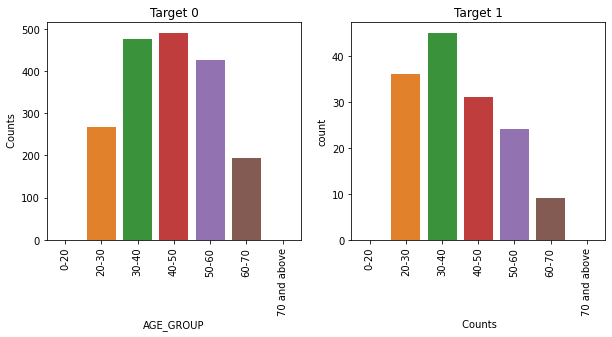

In [58]:
# Univarate analysis on Age group
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
p = sns.countplot(data=target0_df, x= 'AGE_GROUP')
plt.ylabel(" Counts")
plt.xticks(rotation='vertical')
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(data=target1_df, x= 'AGE_GROUP')
plt.xlabel(" Counts")
plt.xticks(rotation='vertical')
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

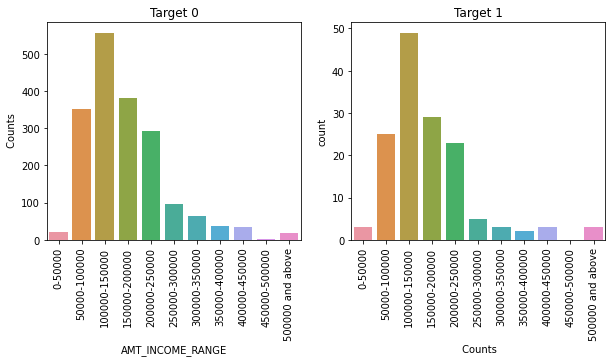

In [59]:
# Univarate analysis on Income Range
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
p = sns.countplot(data=target0_df, x= 'AMT_INCOME_RANGE')
plt.xticks(rotation='vertical')
plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(data=target1_df, x= 'AMT_INCOME_RANGE')
plt.xticks(rotation='vertical')
plt.xlabel(" Counts")
plt.title("Target 1")

# **Univarate Segmented Analysis**

Text(0.5, 1.0, 'Target 1')

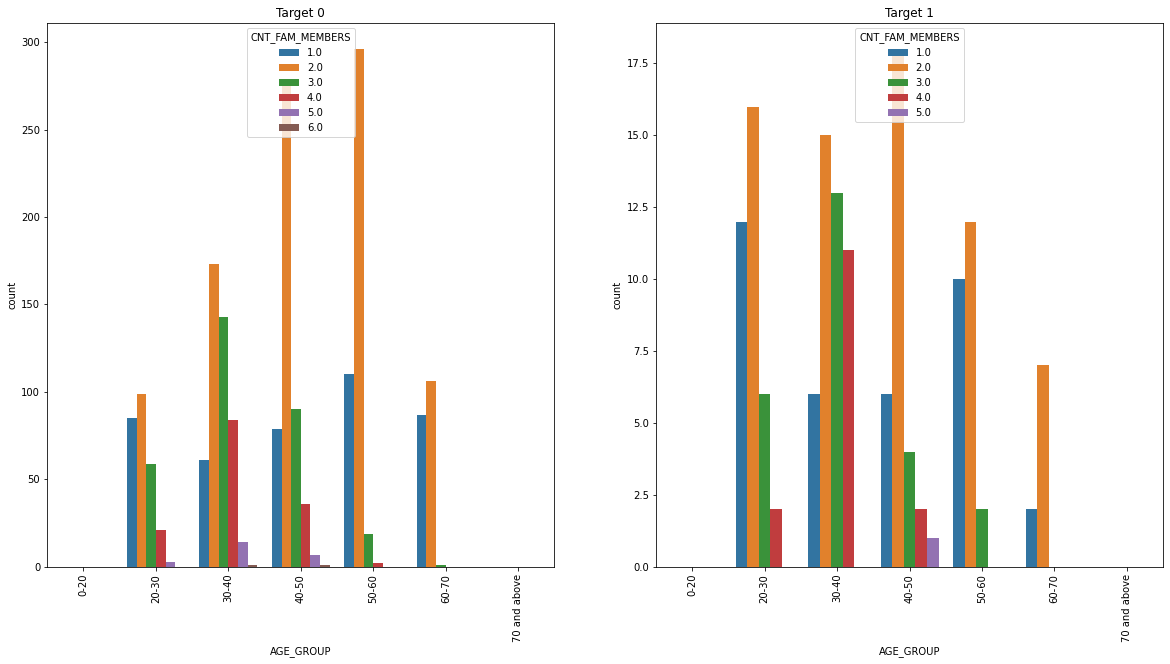

In [60]:
# Univarate analysis of AGE group and Family members
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
p = sns.countplot(x = "AGE_GROUP", hue= 'CNT_FAM_MEMBERS', data = target0_df)
plt.xticks(rotation='vertical')
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(x = "AGE_GROUP", hue= 'CNT_FAM_MEMBERS', data = target1_df)
plt.xticks(rotation='vertical')
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

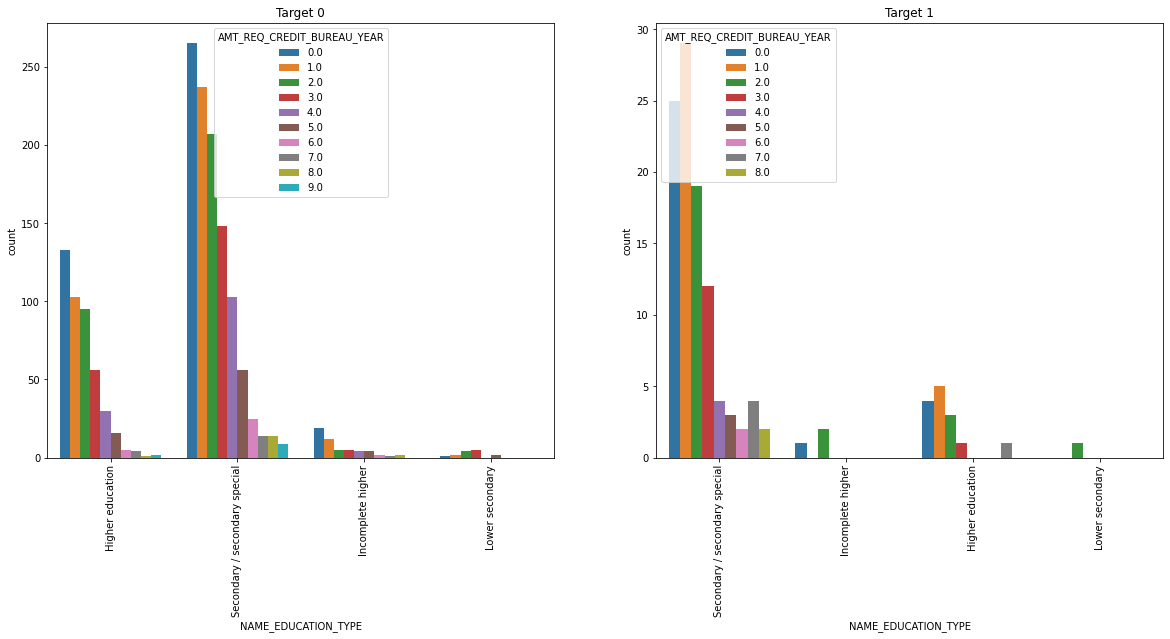

In [61]:
# Univarate Analysis of Education type and Bureau calls.
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
p = sns.countplot(x = "NAME_EDUCATION_TYPE", hue= 'AMT_REQ_CREDIT_BUREAU_YEAR', data = target0_df)
plt.xticks(rotation='vertical')
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(x = "NAME_EDUCATION_TYPE", hue= 'AMT_REQ_CREDIT_BUREAU_YEAR', data = target1_df)
plt.xticks(rotation='vertical')
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

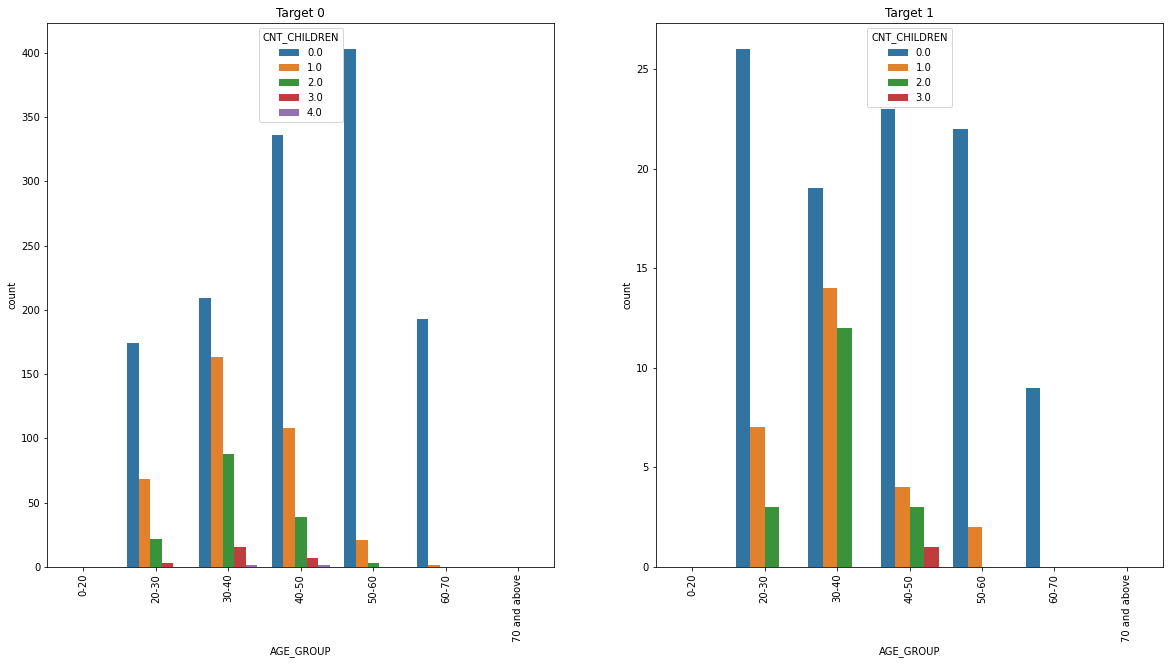

In [62]:
## Univariate analysis on Age group an Number of children
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
p = sns.countplot(x = "AGE_GROUP", hue= 'CNT_CHILDREN', data = target0_df)
plt.xticks(rotation='vertical')
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(x = "AGE_GROUP", hue= 'CNT_CHILDREN', data = target1_df)
plt.xticks(rotation='vertical')
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

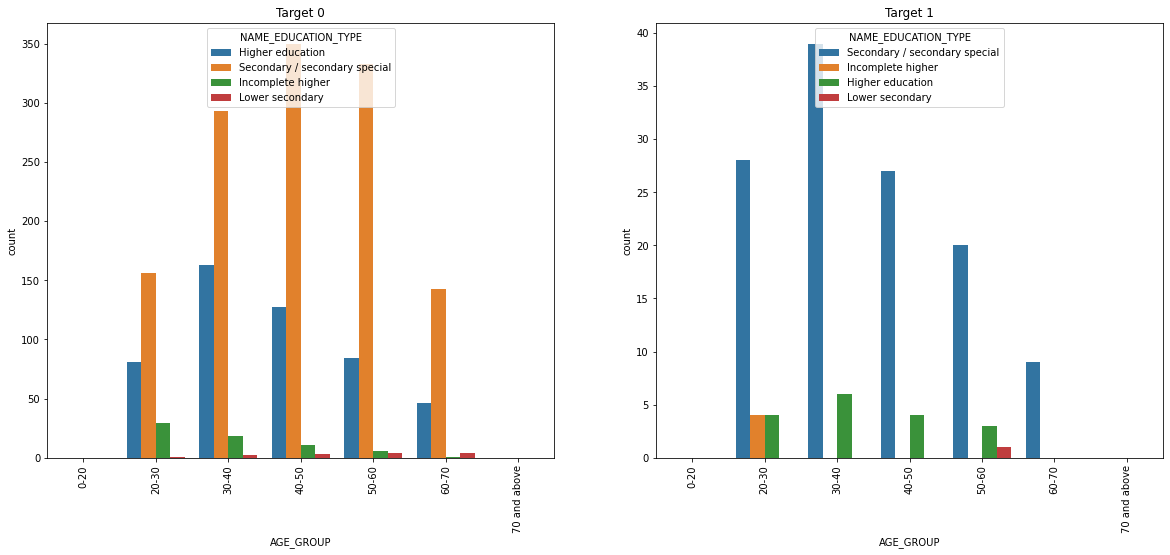

In [63]:
# Univarate Analysis of Age group with Education type.
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
p = sns.countplot(x = "AGE_GROUP", hue= 'NAME_EDUCATION_TYPE', data = target0_df)
plt.xticks(rotation='vertical')
#plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(x = "AGE_GROUP", hue= 'NAME_EDUCATION_TYPE', data = target1_df)
plt.xticks(rotation='vertical')
#plt.ylabel(" Counts")
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

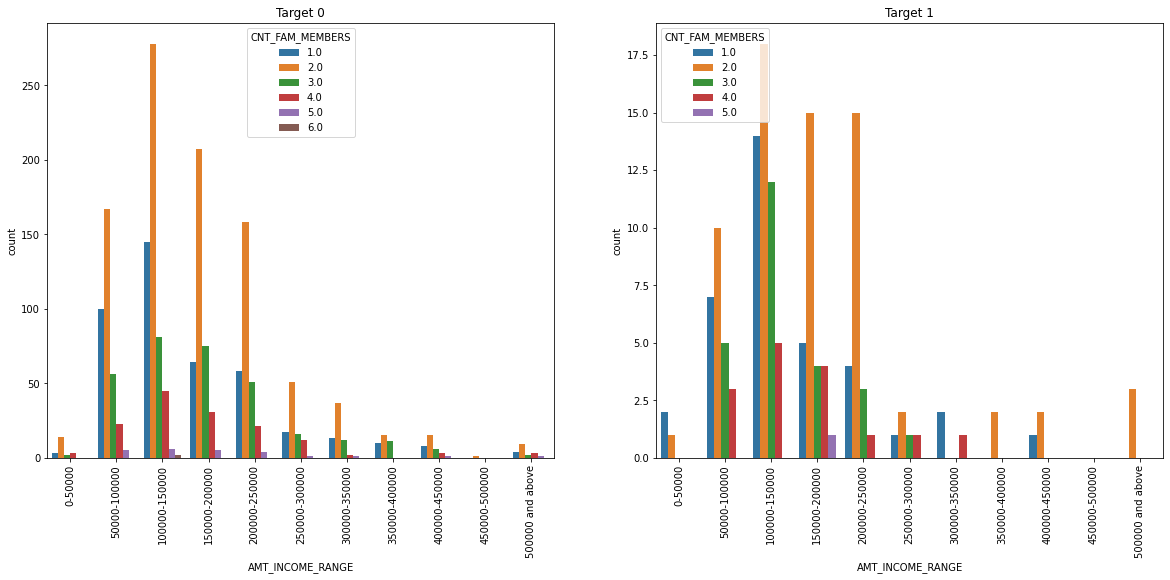

In [64]:
# Univarate Analysis Income range with Family members.
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
p = sns.countplot(x = "AMT_INCOME_RANGE", hue= 'CNT_FAM_MEMBERS', data = target0_df)
plt.xticks(rotation='vertical')
#plt.ylabel(" Counts")
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.countplot(x = "AMT_INCOME_RANGE", hue= 'CNT_FAM_MEMBERS', data = target1_df)
plt.xticks(rotation='vertical')
#plt.ylabel(" Counts")
plt.title("Target 1")

# **Bivariate Analysis**

Text(0.5, 1.0, 'Target 1')

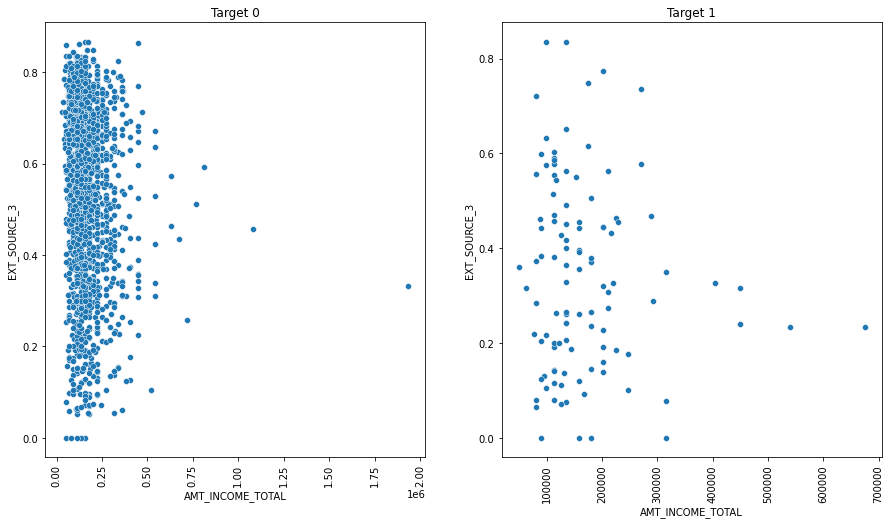

In [65]:
# Bivariate Analysis of EXT souce 2 and income total
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
p = sns.scatterplot(y="EXT_SOURCE_3", x="AMT_INCOME_TOTAL", data=target0_df)
plt.xticks(rotation='vertical')
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.scatterplot(y="EXT_SOURCE_3", x="AMT_INCOME_TOTAL", data=target1_df)
plt.xticks(rotation='vertical')
plt.title("Target 1")   

Text(0.5, 1.0, 'Target 1')

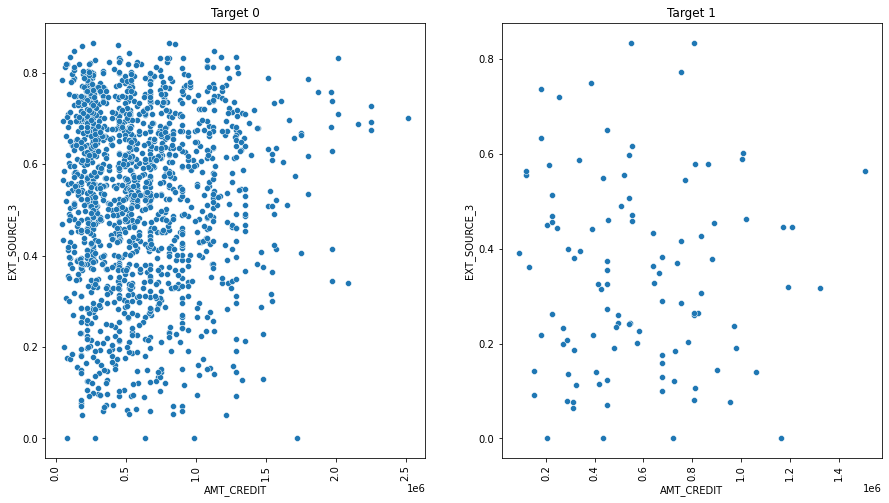

In [66]:
# Bivariate Analysis of EXT source 2 and Amount Credit
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
p = sns.scatterplot(y="EXT_SOURCE_3", x="AMT_CREDIT", data=target0_df)
plt.xticks(rotation='vertical')
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.scatterplot(y="EXT_SOURCE_3", x="AMT_CREDIT", data=target1_df)
plt.xticks(rotation='vertical')
plt.title("Target 1")

Text(0.5, 1.0, 'Target 1')

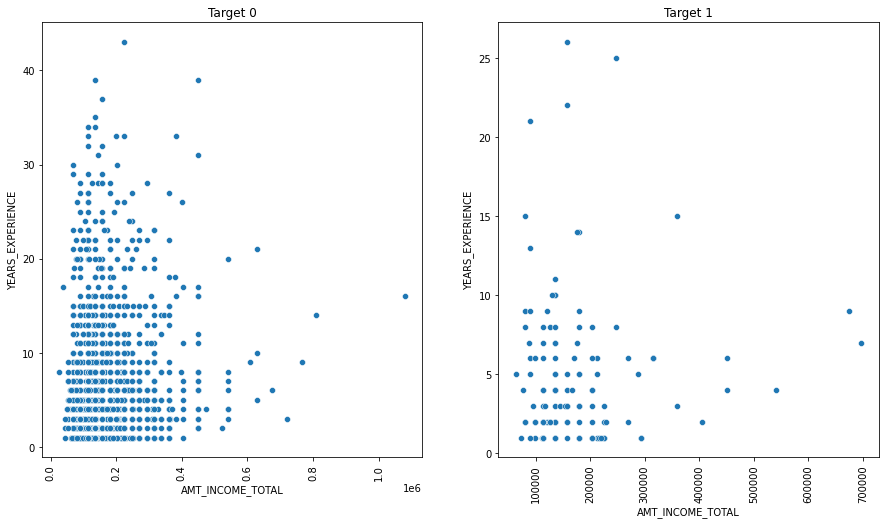

In [67]:
#Bivariate Analysis of Years Experience and Amount Income total
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
p=sns.scatterplot(y="YEARS_EXPERIENCE", x="AMT_INCOME_TOTAL", data=target0_df)
plt.xticks(rotation='vertical')
plt.title("Target 0")
plt.subplot(1,2,2)
p = sns.scatterplot(y="YEARS_EXPERIENCE", x="AMT_INCOME_TOTAL", data=target1_df)
plt.xticks(rotation='vertical')
plt.title("Target 1")

Text(0.5, 1.0, 'Occupation vs Credit Amount')

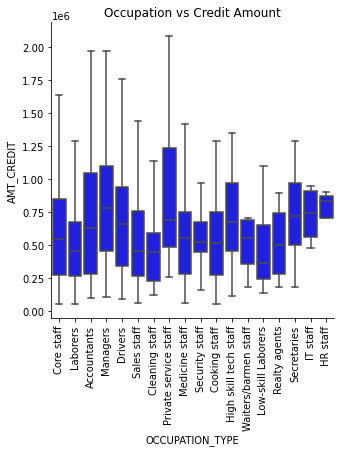

In [68]:
# Bivariate Analysis with box plot for Target 0 ->Occupation type vs Credit
sns.catplot(data =target0_df, x='OCCUPATION_TYPE', y='AMT_CREDIT',kind='box',color='b',showfliers=False)
plt.xticks(rotation='vertical')
plt.title("Occupation vs Credit Amount")

Text(0.5, 1.0, 'Occupation vs Credit Amout')

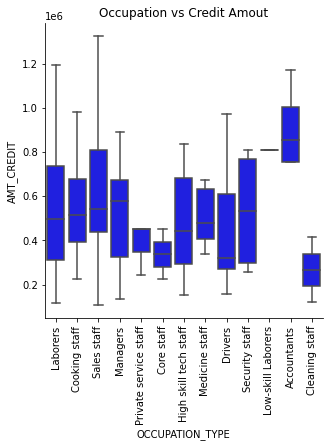

In [69]:
# Bivariate Analysis with box plot for Target 1 ->Occupation type vs Credit
sns.catplot(data =target1_df, x='OCCUPATION_TYPE', y='AMT_CREDIT',kind='box',color='b',showfliers=False)
plt.xticks(rotation='vertical')
plt.title("Occupation vs Credit Amout")

Text(0.5, 1.0, 'Occupation Type vs Income total')

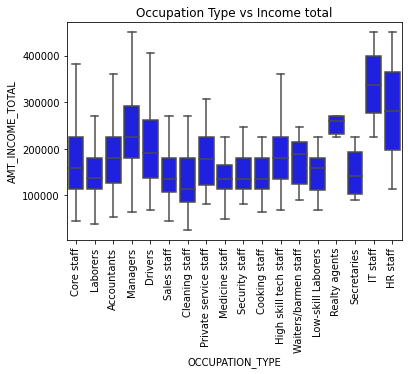

In [70]:
# Bivariate Analysis with box plot for Target 0 ->Occupation type vs Income Total
sns.boxplot(data =target0_df, x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL',color='b',showfliers=False)
plt.xticks(rotation='vertical')
plt.title("Occupation Type vs Income total")

Text(0.5, 1.0, 'Occupation Type vs Income total')

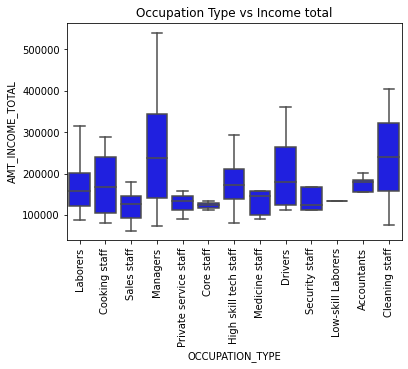

In [71]:
# Bivariate Analysis with box plot for Target 1 ->Occupation type vs Income Total
sns.boxplot(data =target1_df, x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL',color='b',showfliers=False)
plt.xticks(rotation='vertical')
plt.title("Occupation Type vs Income total")

# **Segmented Bivariate Analysis w.r.t Target 1**

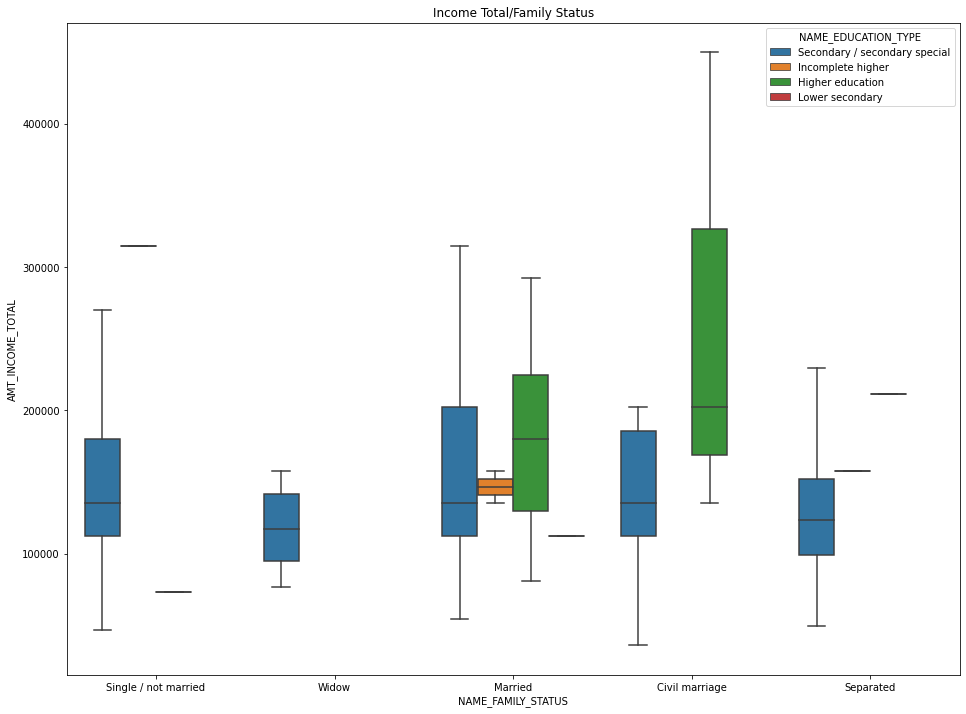

In [72]:
# Plotting with Family status/Income Total and education type
plt.figure(figsize=(16,12))
sns.boxplot(data =target1_df, x='NAME_FAMILY_STATUS', y='AMT_INCOME_TOTAL', hue ='NAME_EDUCATION_TYPE',showfliers=False)
plt.title('Income Total/Family Status')
plt.show()

Among defaulters,higher education has highest income total and lowest income total is for secondary education. These two categories are belongs to widow.

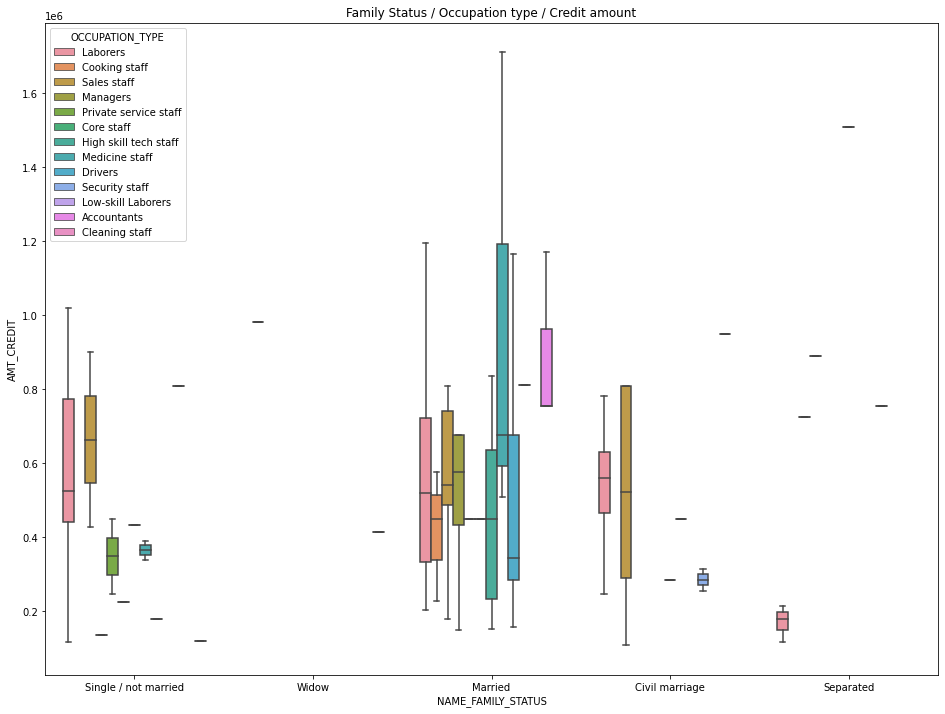

In [73]:
# Plotting with Family Status/Occupation type and Credit amount
plt.figure(figsize=(16,12))
sns.boxplot(data =target1_df, x='NAME_FAMILY_STATUS', y='AMT_CREDIT', hue ='OCCUPATION_TYPE',showfliers=False)
plt.title('Family Status / Occupation type / Credit amount')
plt.show()

# **Correlation**

In [74]:
## Converting Age group from Category to Numeric as we need this column for correlation analysis.

target0_df.AGE_GROUP.replace({"0-20":1,"20-30":2,"30-40" :3,"40-50":4,"50-60":5,"60-70":6,"70 and above": 7},
                              inplace=True)
target0_df.loc[:,'AGE_GROUP'] = pd.to_numeric(target0_df['AGE_GROUP'], errors = 'coerce')
target1_df.AGE_GROUP.replace({"0-20":1,"20-30":2,"30-40" :3,"40-50":4,"50-60":5,"60-70":6,"70 and above": 7},
                              inplace=True)
target1_df.loc[:,'AGE_GROUP'] = pd.to_numeric(target1_df['AGE_GROUP'], errors = 'coerce')

In [76]:
## Converting AMT_INCOME_RANGE from Category to Numeric as we need this column for correlation analysis.

target0_df.AMT_INCOME_RANGE.replace({"50000-100000":1,"100000-150000":2,"150000-200000": 3,"200000-250000": 4,
                                     "200000-250000": 5,"250000-300000": 6,"300000-350000": 7,"350000-400000": 8,
                                      "400000-450000": 9,"450000-500000": 10,"500000 and above": 11},
                                      inplace=True)
target0_df.loc[:,'AMT_INCOME_RANGE'] = pd.to_numeric(target0_df['AMT_INCOME_RANGE'], errors = 'coerce')
target1_df.AMT_INCOME_RANGE.replace({"50000-100000":1,"100000-150000":2,"150000-200000": 3,"200000-250000": 4,
                                     "200000-250000": 5,"250000-300000": 6,"300000-350000": 7,"350000-400000": 8,
                                      "400000-450000": 9,"450000-500000": 10,"500000 and above": 11},
                                      inplace=True)
target1_df.loc[:,'AMT_INCOME_RANGE'] = pd.to_numeric(target1_df['AMT_INCOME_RANGE'], errors = 'coerce')

In [77]:
# Correlation matrix columns -> Removed ID, Target, AMOUNT_INCOME_TOTAL( Kept Income range instead) ,
# Bureau fields others than Year

target0_corr=target0_df[['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_GROUP', 'YEARS_EXPERIENCE',
       'AMT_INCOME_RANGE']]
target1_corr=target1_df[['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_2', 'EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_GROUP', 'YEARS_EXPERIENCE',
       'AMT_INCOME_RANGE']] 

target0=target0_corr.corr()
target1=target1_corr.corr()

In [78]:
# Seeing Target0
target0

,CODE_GENDER,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,YEARS_EXPERIENCE,AMT_INCOME_RANGE
CODE_GENDER,1.000000,-0.032102,-0.035712,-0.077228,-0.040170,-0.084590,0.004690,-0.011134,0.014996,0.122997,0.091863,-0.208509
CNT_CHILDREN,-0.032102,1.000000,0.010112,0.033192,0.011008,0.878412,-0.009525,-0.064895,-0.046737,-0.329040,-0.059063,0.040773
AMT_CREDIT,-0.035712,0.010112,1.000000,0.789226,0.985999,0.084795,0.132929,0.029558,-0.003642,0.096743,0.114054,0.412097
AMT_ANNUITY,-0.077228,0.033192,0.789226,1.000000,0.793486,0.102957,0.137689,0.004896,0.046112,0.027649,0.075303,0.473943
AMT_GOODS_PRICE,-0.040170,0.011008,0.985999,0.793486,1.000000,0.084490,0.142235,0.032533,-0.012089,0.091809,0.117233,0.425245
CNT_FAM_MEMBERS,-0.084590,0.878412,0.084795,0.102957,0.084490,1.000000,-0.013189,-0.038097,-0.023480,-0.284093,-0.032924,0.044294
EXT_SOURCE_2,0.004690,-0.009525,0.132929,0.137689,0.142235,-0.013189,1.000000,0.059091,-0.032204,0.066349,0.086644,0.164579
EXT_SOURCE_3,-0.011134,-0.064895,0.029558,0.004896,0.032533,-0.038097,0.059091,1.000000,-0.014380,0.173188,0.092209,-0.064204
AMT_REQ_CREDIT_BUREAU_YEAR,0.014996,-0.046737,-0.003642,0.046112,-0.012089,-0.023480,-0.032204,-0.014380,1.000000,0.074685,-0.016838,0.042725
AGE_GROUP,0.122997,-0.329040,0.096743,0.027649,0.091809,-0.284093,0.066349,0.173188,0.074685,1.000000,0.344242,-0.022719


In [79]:
# Seeing Target1
target1

,CODE_GENDER,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_GROUP,YEARS_EXPERIENCE,AMT_INCOME_RANGE
CODE_GENDER,1.000000,0.023093,0.068956,-0.070191,0.074470,-0.013639,0.116468,0.065225,0.142741,0.243341,0.275540,-0.160996
CNT_CHILDREN,0.023093,1.000000,-0.019805,-0.033334,-0.009863,0.875377,-0.026607,-0.042769,-0.038650,-0.217650,0.023211,-0.126909
AMT_CREDIT,0.068956,-0.019805,1.000000,0.803868,0.980994,0.050020,0.056760,-0.011463,0.101208,0.231209,0.181784,0.197720
AMT_ANNUITY,-0.070191,-0.033334,0.803868,1.000000,0.808612,0.031114,0.091218,-0.103376,0.082670,0.031777,0.156283,0.299276
AMT_GOODS_PRICE,0.074470,-0.009863,0.980994,0.808612,1.000000,0.070477,0.061090,-0.024077,0.105003,0.239438,0.209785,0.196028
CNT_FAM_MEMBERS,-0.013639,0.875377,0.050020,0.031114,0.070477,1.000000,-0.001022,-0.084634,0.002478,-0.157016,0.055963,-0.063396
EXT_SOURCE_2,0.116468,-0.026607,0.056760,0.091218,0.061090,-0.001022,1.000000,-0.025145,0.170973,0.111946,-0.051016,0.097610
EXT_SOURCE_3,0.065225,-0.042769,-0.011463,-0.103376,-0.024077,-0.084634,-0.025145,1.000000,-0.005656,0.204479,0.007864,-0.081889
AMT_REQ_CREDIT_BUREAU_YEAR,0.142741,-0.038650,0.101208,0.082670,0.105003,0.002478,0.170973,-0.005656,1.000000,0.158390,0.153859,0.006042
AGE_GROUP,0.243341,-0.217650,0.231209,0.031777,0.239438,-0.157016,0.111946,0.204479,0.158390,1.000000,0.364548,0.061096


In [80]:
# Finding Top 10 correlation matrix for Target = 0
corrdf = target0.where(np.triu(np.ones(target0.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Variable_1', 'Variable_2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).reset_index(drop=True).head(10)

,Variable_1,Variable_2,Correlation
0,AMT_GOODS_PRICE,AMT_CREDIT,0.99
1,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
2,AMT_ANNUITY,AMT_CREDIT,0.79
3,AMT_GOODS_PRICE,AMT_ANNUITY,0.79
4,AMT_INCOME_RANGE,AMT_ANNUITY,0.47
5,AMT_INCOME_RANGE,AMT_GOODS_PRICE,0.43
6,AMT_INCOME_RANGE,AMT_CREDIT,0.41
7,YEARS_EXPERIENCE,AGE_GROUP,0.34
8,AGE_GROUP,CNT_CHILDREN,0.33
9,AGE_GROUP,CNT_FAM_MEMBERS,0.28


In [81]:
# Top 10 correlation matrix for Target = 1

corrdf = target1.where(np.triu(np.ones(target1.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Variable_1', 'Variable_2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).reset_index(drop=True).head(10)

,Variable_1,Variable_2,Correlation
0,AMT_GOODS_PRICE,AMT_CREDIT,0.98
1,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
2,AMT_GOODS_PRICE,AMT_ANNUITY,0.81
3,AMT_ANNUITY,AMT_CREDIT,0.80
4,YEARS_EXPERIENCE,AGE_GROUP,0.36
5,AMT_INCOME_RANGE,AMT_ANNUITY,0.30
6,YEARS_EXPERIENCE,CODE_GENDER,0.28
7,AGE_GROUP,AMT_GOODS_PRICE,0.24
8,AGE_GROUP,CODE_GENDER,0.24
9,AGE_GROUP,AMT_CREDIT,0.23


In [82]:
# Vizualisation of correlation using Heat map.

def corr_matrix(data,title):
    plt.figure(figsize=(10, 12))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 50
 # masking the upper side   
    mask = np.zeros_like(data, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Want diagonal elements as well
    mask[np.diag_indices_from(mask)] = False

# heatmap with a color map of choice
    ax=sns.heatmap(data, cmap="YlGnBu",mask=mask,annot=True,linewidth=.3)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

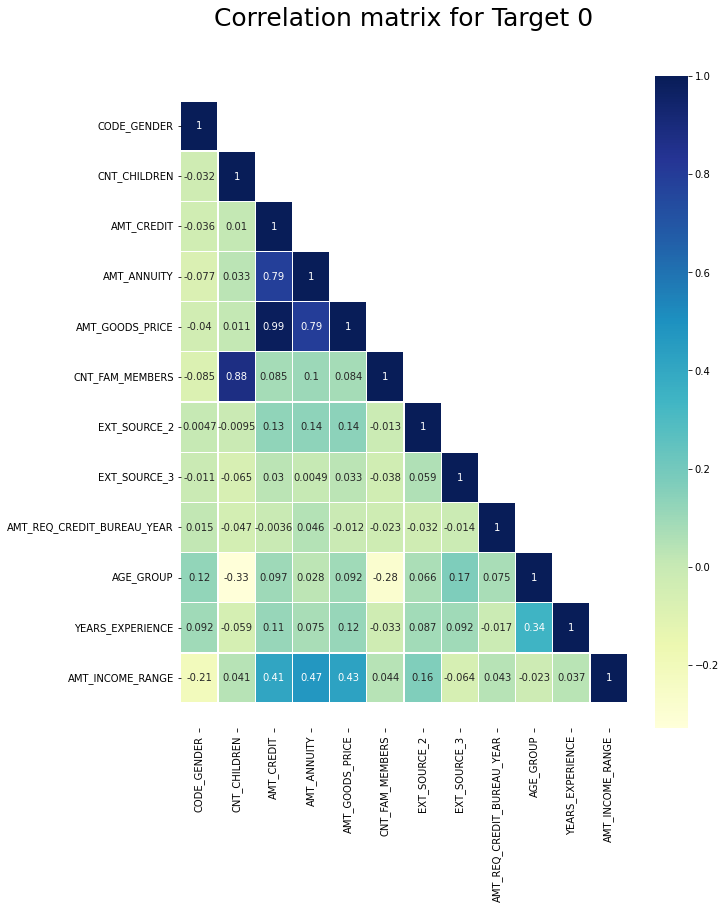

In [83]:
# For Target 0
corr_matrix(data=target0,title='Correlation matrix for Target 0')

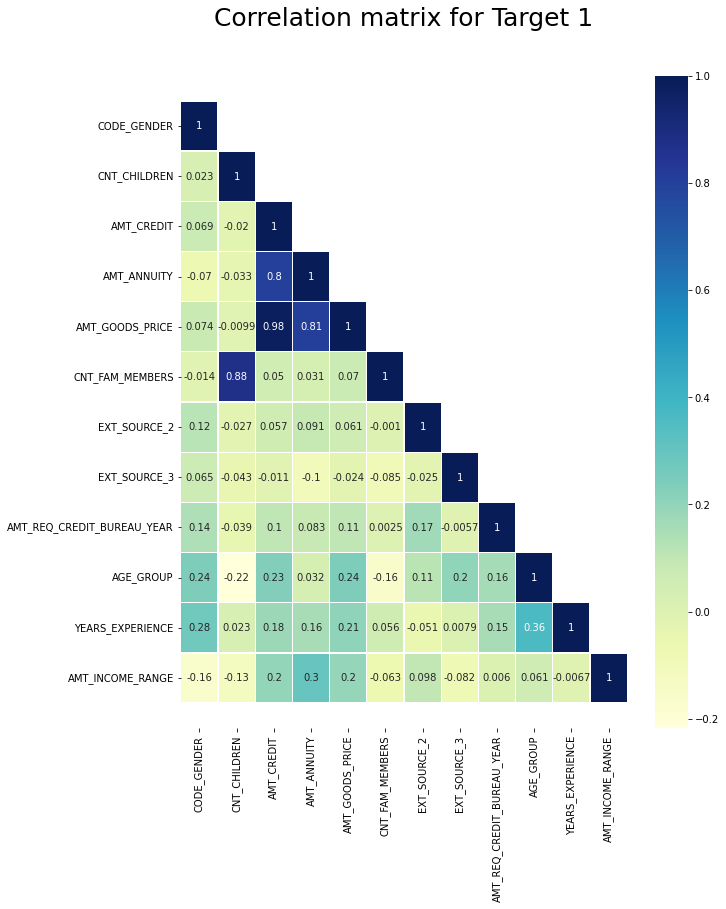

In [84]:
# For Target 1
corr_matrix(data=target1,title='Correlation matrix for Target 1')